In [25]:
!pip install tensorflow


In [26]:
conda activate tf


Note: you may need to restart the kernel to use updated packages.



CondaError: Run 'conda init' before 'conda activate'



# **P1**

In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical

X, y = load_iris(return_X_y=True)
print(list(set(y)))
y_cat = to_categorical(y, num_classes=3)
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, stratify=y)


[np.int64(0), np.int64(1), np.int64(2)]


In [28]:
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
input_size= X_train.shape[1]  

**The Custom Model**

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.activations import relu, softmax



In [30]:
custom_model= Sequential([
    Dense(16, activation="relu", input_shape=(input_size,)),
    Dense(3, activation="softmax")])
custom_model.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])


c:\Users\nooba\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
custom_model.fit(X_train, y_train, epochs=200, batch_size=8, validation_split=0.2,verbose=2)

Epoch 1/200


12/12 - 0s - 40ms/step - accuracy: 0.6146 - loss: 0.8685 - val_accuracy: 0.5833 - val_loss: 0.8831
Epoch 2/200
Epoch 2/200
12/12 - 0s - 4ms/step - accuracy: 0.6979 - loss: 0.7939 - val_accuracy: 0.6250 - val_loss: 0.8289
Epoch 3/200
12/12 - 0s - 4ms/step - accuracy: 0.6979 - loss: 0.7939 - val_accuracy: 0.6250 - val_loss: 0.8289
Epoch 3/200
12/12 - 0s - 4ms/step - accuracy: 0.7083 - loss: 0.7329 - val_accuracy: 0.6250 - val_loss: 0.7817
Epoch 4/200
12/12 - 0s - 4ms/step - accuracy: 0.7083 - loss: 0.7329 - val_accuracy: 0.6250 - val_loss: 0.7817
Epoch 4/200
12/12 - 0s - 4ms/step - accuracy: 0.7188 - loss: 0.6820 - val_accuracy: 0.6250 - val_loss: 0.7430
Epoch 5/200
12/12 - 0s - 4ms/step - accuracy: 0.7188 - loss: 0.6820 - val_accuracy: 0.6250 - val_loss: 0.7430
Epoch 5/200
12/12 - 0s - 4ms/step - accuracy: 0.7292 - loss: 0.6381 - val_accuracy: 0.6250 - val_loss: 0.7115
Epoch 6/200
12/12 - 0s - 4ms/step - accuracy: 0.7292 - loss: 0.6381 - val_accuracy: 0.6250 - val_loss: 0.7115
Epoch 6/2

In [34]:
print(custom_model.summary())
test_loss, test_accuracy = custom_model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}')

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 395 (1.55 KB)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 264 (1.04 KB)

None
Test accuracy: 0.9667, Test loss: 0.1007


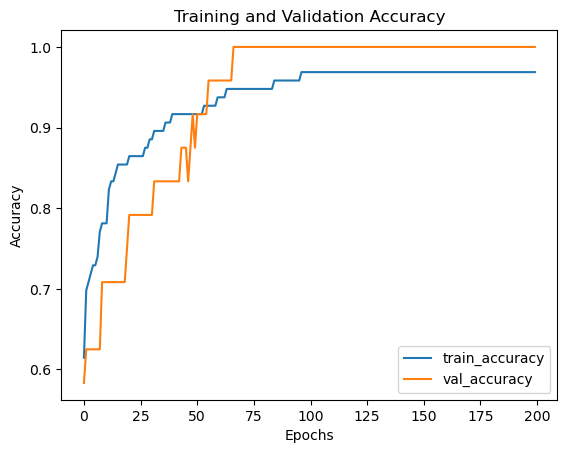

In [36]:
from matplotlib import pyplot as plt
history = custom_model.history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

##  **P2**

In [20]:
from tensorflow.keras.datasets import imdb
(X_train_init, y_train_init), (X_test, y_test) = imdb.load_data(num_words=10000)

In [21]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X_train_init, y_train_init, test_size=0.2, random_state=42)

# Pad sequences to same length (max 500 words)
maxlen = 500
X_train = pad_sequences(X_train, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (20000, 500)
X_val shape: (5000, 500)
X_test shape: (25000, 500)


In [30]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
from tensorflow.keras.activations import relu, softmax
import time
custom_model2=Sequential([
    Embedding(input_dim=10000, output_dim=64),Flatten(),Dense(32, activation="relu"),Dense(1, activation="sigmoid")
])
custom_model2.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])
start_time_custom_model2=time.time()
custom_model2.fit(X_train, y_train, epochs=12, batch_size=32, validation_data=(X_val, y_val), verbose=2)
end_time_custom_model2=time.time()
print(f"Custom Model 2 Training Time: {end_time_custom_model2 - start_time_custom_model2} seconds")


Epoch 1/12
625/625 - 2s - 3ms/step - accuracy: 0.7978 - loss: 0.4120 - val_accuracy: 0.8712 - val_loss: 0.3064
Epoch 2/12
625/625 - 2s - 3ms/step - accuracy: 0.7978 - loss: 0.4120 - val_accuracy: 0.8712 - val_loss: 0.3064
Epoch 2/12
625/625 - 1s - 2ms/step - accuracy: 0.9651 - loss: 0.1019 - val_accuracy: 0.8626 - val_loss: 0.3780
Epoch 3/12
625/625 - 1s - 2ms/step - accuracy: 0.9651 - loss: 0.1019 - val_accuracy: 0.8626 - val_loss: 0.3780
Epoch 3/12
625/625 - 1s - 2ms/step - accuracy: 0.9983 - loss: 0.0099 - val_accuracy: 0.8686 - val_loss: 0.4506
Epoch 4/12
625/625 - 1s - 2ms/step - accuracy: 0.9983 - loss: 0.0099 - val_accuracy: 0.8686 - val_loss: 0.4506
Epoch 4/12
625/625 - 1s - 2ms/step - accuracy: 0.9999 - loss: 0.0014 - val_accuracy: 0.8686 - val_loss: 0.5020
Epoch 5/12
625/625 - 1s - 2ms/step - accuracy: 0.9999 - loss: 0.0014 - val_accuracy: 0.8686 - val_loss: 0.5020
Epoch 5/12
625/625 - 1s - 2ms/step - accuracy: 1.0000 - loss: 3.7400e-04 - val_accuracy: 0.8696 - val_loss: 0.53

In [23]:
print(custom_model2.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (32, 500, 64)          │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (32, 32000)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 32)               │     1,024,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 1)                │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,992,197 (19.04 MB)

 Trainable params: 1,664,065 (6.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,328,132 (12.70 MB)

None


In [24]:
loss,acc=custom_model2.evaluate(X_test, y_test, verbose=0)
print(f"Test loss: {loss:.4f}, Test accuracy: {acc:.4f}")


Test loss: 0.6526, Test accuracy: 0.8676


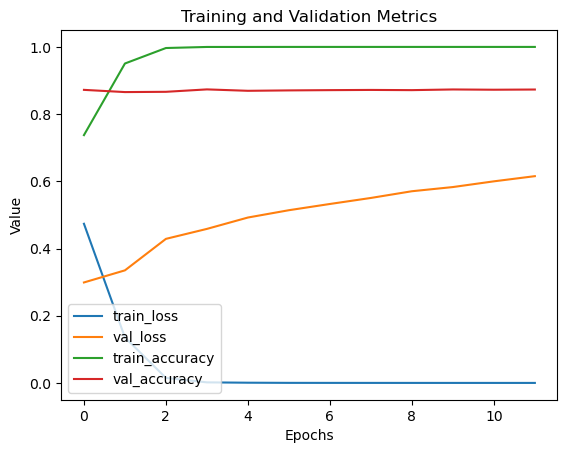

In [25]:
from matplotlib import pyplot as plt
history = custom_model2.history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.title('Training and Validation Metrics')
plt.legend()
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 657us/step


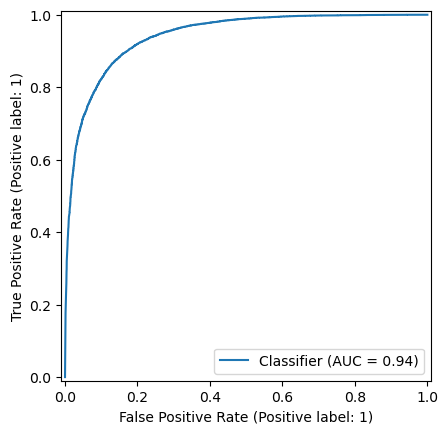

In [26]:
from sklearn.metrics import RocCurveDisplay
y_pred_prob = custom_model2.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_prob)

## **P3**

In [27]:
## data splitted for p2 so  not done again
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, Flatten
from tensorflow.keras.activations import relu, softmax
custom_model3=Sequential([Embedding(input_dim=10000, output_dim=64),Flatten(),Dense(64, activation="relu"),Dropout(0.2),Dense(32,activation="relu"),Dropout(0.2),Dense(16,activation="relu"),Dense(1,activation="sigmoid")])
custom_model3.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [28]:
print(custom_model2.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (32, 500, 64)          │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (32, 32000)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (32, 32)               │     1,024,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (32, 1)                │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,992,197 (19.04 MB)

 Trainable params: 1,664,065 (6.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,328,132 (12.70 MB)

None


In [31]:
import time
start_time_custommodel3=time.time()
custom_model3.fit(X_train, y_train, epochs=17, batch_size=32, validation_data=(X_val, y_val), verbose=2)
end_time_custommodel3=time.time()



Epoch 1/17
625/625 - 2s - 3ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.8402 - val_loss: 1.2664
Epoch 2/17
625/625 - 2s - 3ms/step - accuracy: 0.9992 - loss: 0.0029 - val_accuracy: 0.8402 - val_loss: 1.2664
Epoch 2/17
625/625 - 2s - 3ms/step - accuracy: 0.9991 - loss: 0.0031 - val_accuracy: 0.8332 - val_loss: 1.5670
Epoch 3/17
625/625 - 2s - 3ms/step - accuracy: 0.9991 - loss: 0.0031 - val_accuracy: 0.8332 - val_loss: 1.5670
Epoch 3/17
625/625 - 2s - 3ms/step - accuracy: 0.9979 - loss: 0.0064 - val_accuracy: 0.8416 - val_loss: 1.1110
Epoch 4/17
625/625 - 2s - 3ms/step - accuracy: 0.9979 - loss: 0.0064 - val_accuracy: 0.8416 - val_loss: 1.1110
Epoch 4/17
625/625 - 2s - 3ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.8412 - val_loss: 1.2452
Epoch 5/17
625/625 - 2s - 3ms/step - accuracy: 0.9991 - loss: 0.0029 - val_accuracy: 0.8412 - val_loss: 1.2452
Epoch 5/17
625/625 - 2s - 3ms/step - accuracy: 0.9995 - loss: 0.0026 - val_accuracy: 0.8418 - val_loss: 1.4552
E

Custom Model 3 Training Time: 35.013827085494995 seconds. Custom Model 2 Training Time: 18.361992835998535 seconds.
Custom Model 3 Test accuracy: 0.8244. Custom Model 2 Test accuracy: 0.8676.
Custom Model 3 Test accuracy: 0.8244. Custom Model 2 Test accuracy: 0.8676.


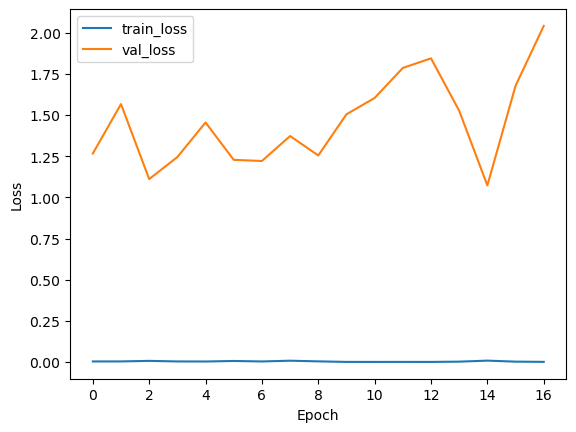

Huge gap between training and validation loss as  well as one being stuck in custom model 3 indicates overfitting compared to custom model 2.


In [38]:
#time comparison
print(f"Custom Model 3 Training Time: {end_time_custommodel3 - start_time_custommodel3} seconds. Custom Model 2 Training Time: {end_time_custom_model2 - start_time_custom_model2} seconds.")

# test accuracy
loss3,acc3=custom_model3.evaluate(X_test, y_test, verbose=0)
print(f"Custom Model 3 Test accuracy: {acc3:.4f}. Custom Model 2 Test accuracy: {acc:.4f}.")

history3=custom_model3.history
plt.plot(history3.history['loss'], label='train_loss')
plt.plot(history3.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Huge gap between training and validation loss as  well as one being stuck in custom model 3 indicates overfitting compared to custom model 2.")


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step


Text(0.5, 1.0, 'Confusion Matrix for Custom Model 2')

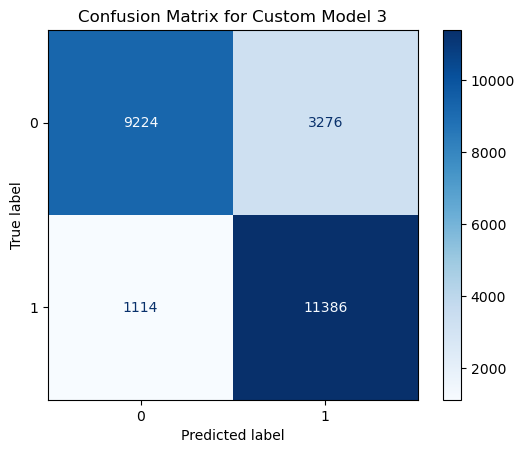

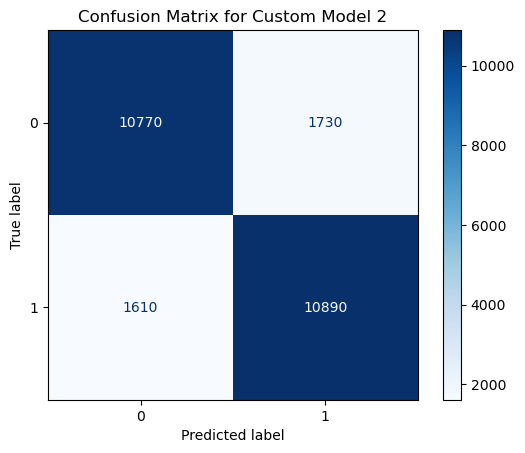

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_prob3 = custom_model3.predict(X_test)
y_pred3 = (y_pred_prob3 >= 0.5).astype(int)
cm3 = confusion_matrix(y_test, y_pred3)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=[0, 1])
disp3.plot(cmap=plt.cm.Blues)
disp3.ax_.set_title("Confusion Matrix for Custom Model 3")


y_pred2=(custom_model2.predict(X_test) >= 0.5).astype(int)
cm2 = confusion_matrix(y_test, y_pred2)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0, 1])
disp2.plot(cmap=plt.cm.Blues)
disp2.ax_.set_title("Confusion Matrix for Custom Model 2")

In [43]:
print("Model 3 has slightly better accuracy but suffers from overfitting compared to Model 2. So Model 2 is preferred.")

Model 3 has slightly better accuracy but suffers from overfitting compared to Model 2. So Model 2 is preferred.
